In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import yfinance as yf
import datetime
import pytz

In [2]:
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")
sp500.to_csv("sp500.csv")

In [3]:
sp500.drop(columns=['Dividends', 'Stock Splits'], inplace=True)
sp500["Tomorrow"] = sp500["Close"].shift(-1)


In [4]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-12-27 00:00:00-05:00,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,4783.350098
2023-12-28 00:00:00-05:00,4786.439941,4793.299805,4780.979980,4783.350098,2698860000,4769.830078
2023-12-29 00:00:00-05:00,4782.879883,4788.430176,4751.990234,4769.830078,3126060000,4742.830078


In [5]:
date_before = datetime.datetime(1990, 1, 1, tzinfo=pytz.timezone('America/New_York'))
date_before

datetime.datetime(1990, 1, 1, 0, 0, tzinfo=<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>)

In [16]:
dataset = sp500[sp500.index > date_before]
dataset.shape

(8567, 6)

In [17]:
dataset.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Tomorrow'], dtype='object')

In [18]:
dataset = dataset.copy()
dataset.loc[:, 'Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset.loc[:, 'Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset.loc[:, 'Buy_Sell'] = np.where(dataset['Close'].shift(-1) > dataset['Close'],1,0)
dataset.loc[:,'Returns'] = dataset['Close'].pct_change()
dataset = dataset.dropna()

In [19]:
dataset

,Open,High,Low,Close,Volume,Tomorrow,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0,0,-0.002586
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0,0,-0.008613
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,0,0,1,-0.009756
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,1,1,0,0.004514
1990-01-09 00:00:00-05:00,353.829987,354.170013,349.609985,349.619995,155210000,347.309998,1,0,0,-0.011787
...,...,...,...,...,...,...,...,...,...,...
2023-12-26 00:00:00-05:00,4758.859863,4784.720215,4758.450195,4774.750000,2513910000,4781.580078,1,1,1,0.004232
2023-12-27 00:00:00-05:00,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,4783.350098,0,1,1,0.001430
2023-12-28 00:00:00-05:00,4786.439941,4793.299805,4780.979980,4783.350098,2698860000,4769.830078,1,0,0,0.000370


# Visualisation

<Axes: xlabel='Date', ylabel='Close'>

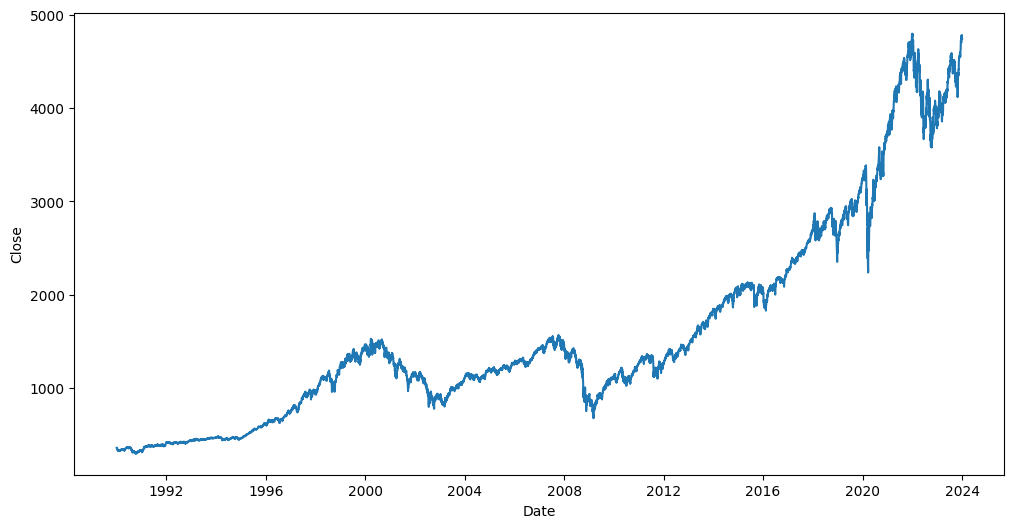

In [20]:
#Create a Seaborn line plot using the datetime index and 'Close' values from the dataset
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
sns.lineplot(x=dataset.index ,y=dataset['Close'])

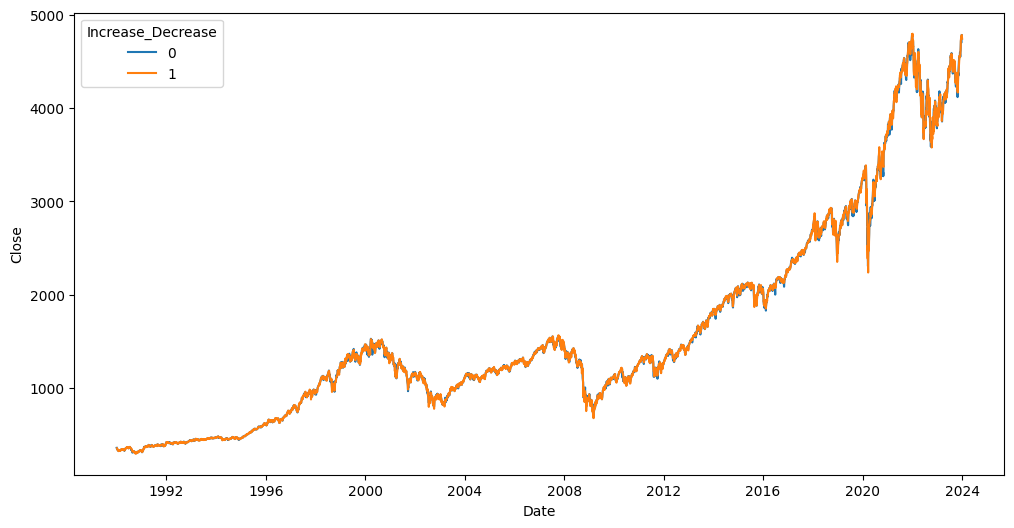

In [25]:
# Create a Seaborn line plot with the 'Close' values over time, differentiating by the 'Increase_Decrease' column
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
ax = sns.lineplot(x=dataset.index, y="Close", hue="Increase_Decrease", data=dataset)

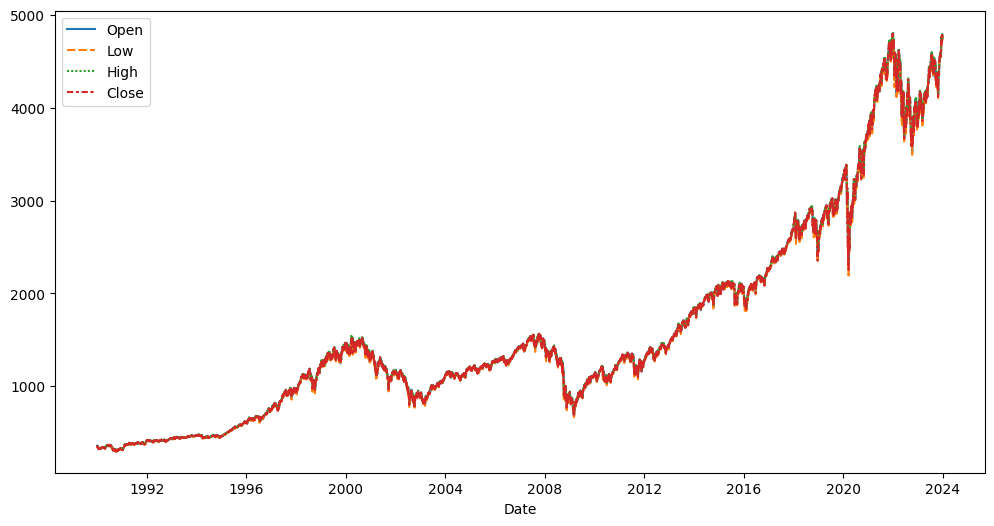

In [26]:
# Create a Seaborn line plot for the 'Open', 'Low', 'High', and 'Close' columns of the dataset
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
ax = sns.lineplot(data=dataset[['Open', 'Low', 'High', 'Close']])

In [27]:
# Count the occurrences of unique values in the 'Increase_Decrease' column of the dataset
dataset['Increase_Decrease'].value_counts()

Increase_Decrease
0    4296
1    4269
Name: count, dtype: int64

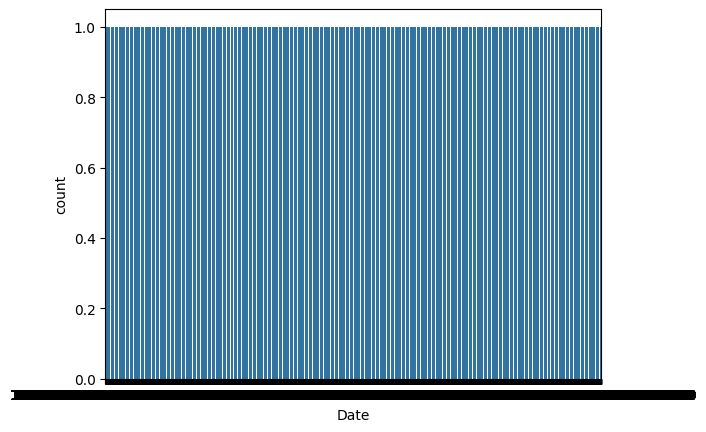

In [28]:
# Create a Seaborn count plot for the 'Increase_Decrease' column, displaying the count of each unique value
ax = sns.countplot(dataset['Increase_Decrease'],label="Count")   

<Axes: xlabel='Open', ylabel='Close'>

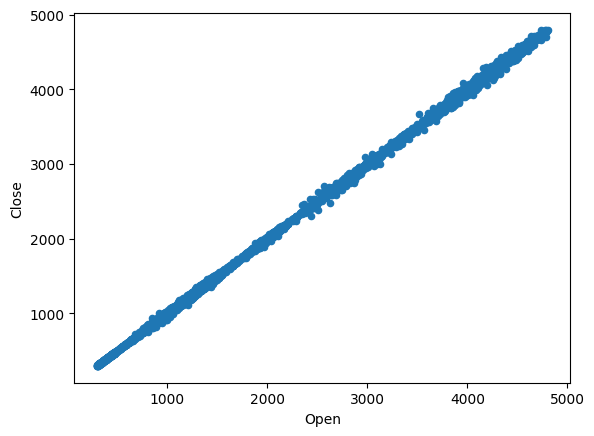

In [29]:
# Create a scatter plot using the 'Open' values as x-axis and 'Close' values as y-axis from the dataset
dataset.plot(kind="scatter", x="Open", y="Close")

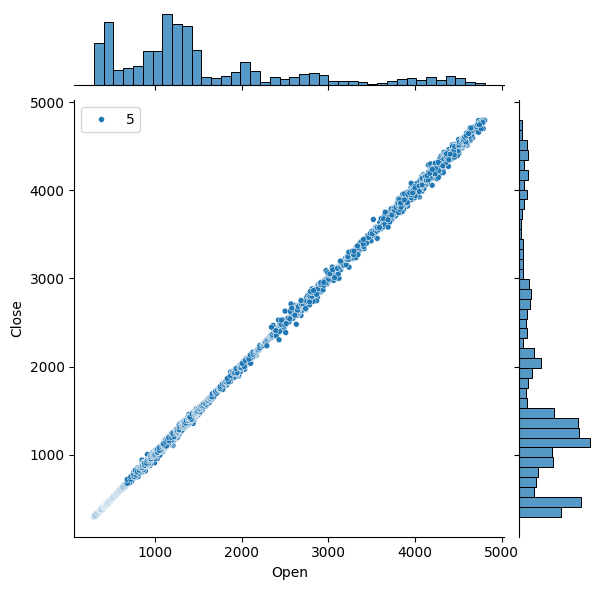

In [30]:
# Create bivariate scatterplots and univariate histograms
sns.jointplot(x="Open", y="Close", data=dataset, size=5)

<Axes: xlabel='Open', ylabel='Close'>

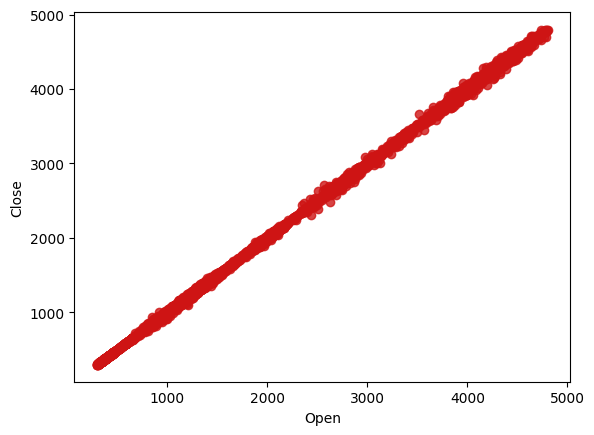

In [33]:
# Create a regression line, using 'Open' as x-axis and 'Close' as y-axis
sns.regplot(x='Open', y='Close', data=dataset, color="#ce1414")

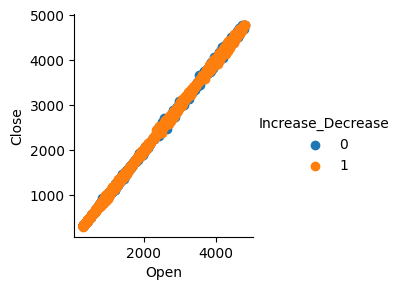

In [35]:
# Create a FacetGrid to display scatter plots of 'Open' vs 'Close' with different colors based on 'Increase_Decrease'
sns.FacetGrid(dataset, hue="Increase_Decrease") \
   .map(plt.scatter, "Open", "Close") \
   .add_legend()

<Axes: xlabel='Increase_Decrease', ylabel='Close'>

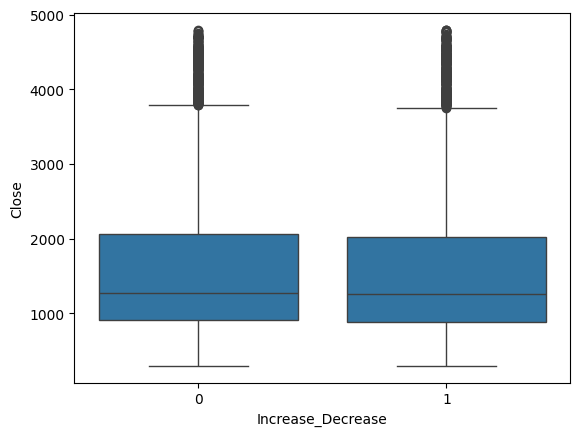

In [36]:
# Create a box plot with 'Increase_Decrease' on the x-axis and 'Close' values on the y-axis
sns.boxplot(x='Increase_Decrease', y=dataset['Close'], data=dataset)

/var/folders/70/6mdh7ckj7nz56t9705xll_bh0000gn/T/ipykernel_1643/1675448577.py:2: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  ax = sns.stripplot(x='Increase_Decrease', y=dataset['Close'], data=dataset, jitter=True, edgecolor="gray")


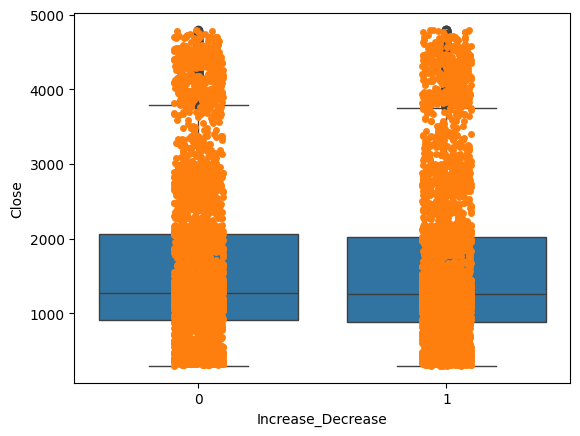

In [37]:
# Create a box plot with 'Increase_Decrease' on the x-axis and 'Close' values on the y-axis. Add a strip plot to 
# show individual data points with jitter for better visibility
ax = sns.boxplot(x='Increase_Decrease', y=dataset['Close'], data=dataset)
ax = sns.stripplot(x='Increase_Decrease', y=dataset['Close'], data=dataset, jitter=True, edgecolor="gray")

<Axes: xlabel='Increase_Decrease', ylabel='Close'>

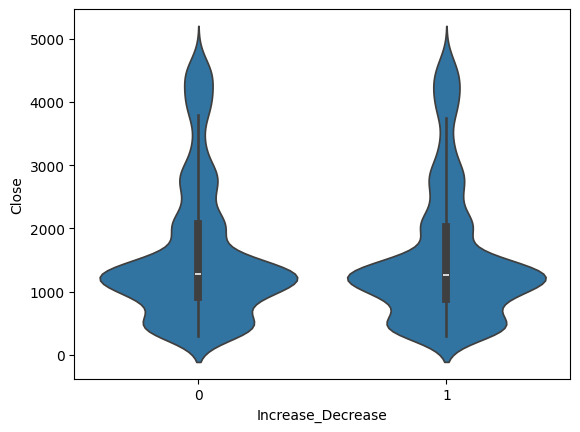

In [40]:
# Create a violin plot with 'Increase_Decrease' on the x-axis and 'Close' values on the y-axis
sns.violinplot(x='Increase_Decrease', y=dataset['Close'], data=dataset)

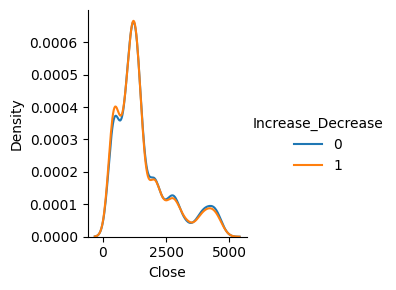

In [41]:
# Create a Seaborn FacetGrid to display kernel density plots of 'Close' 
# with different colors based on 'Increase_Decrease'. Map kernel density plots onto the grid using 'Close' 
# as the variable of interest

sns.FacetGrid(dataset, hue="Increase_Decrease") \
   .map(sns.kdeplot, "Close") \
   .add_legend()

/Users/apple/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


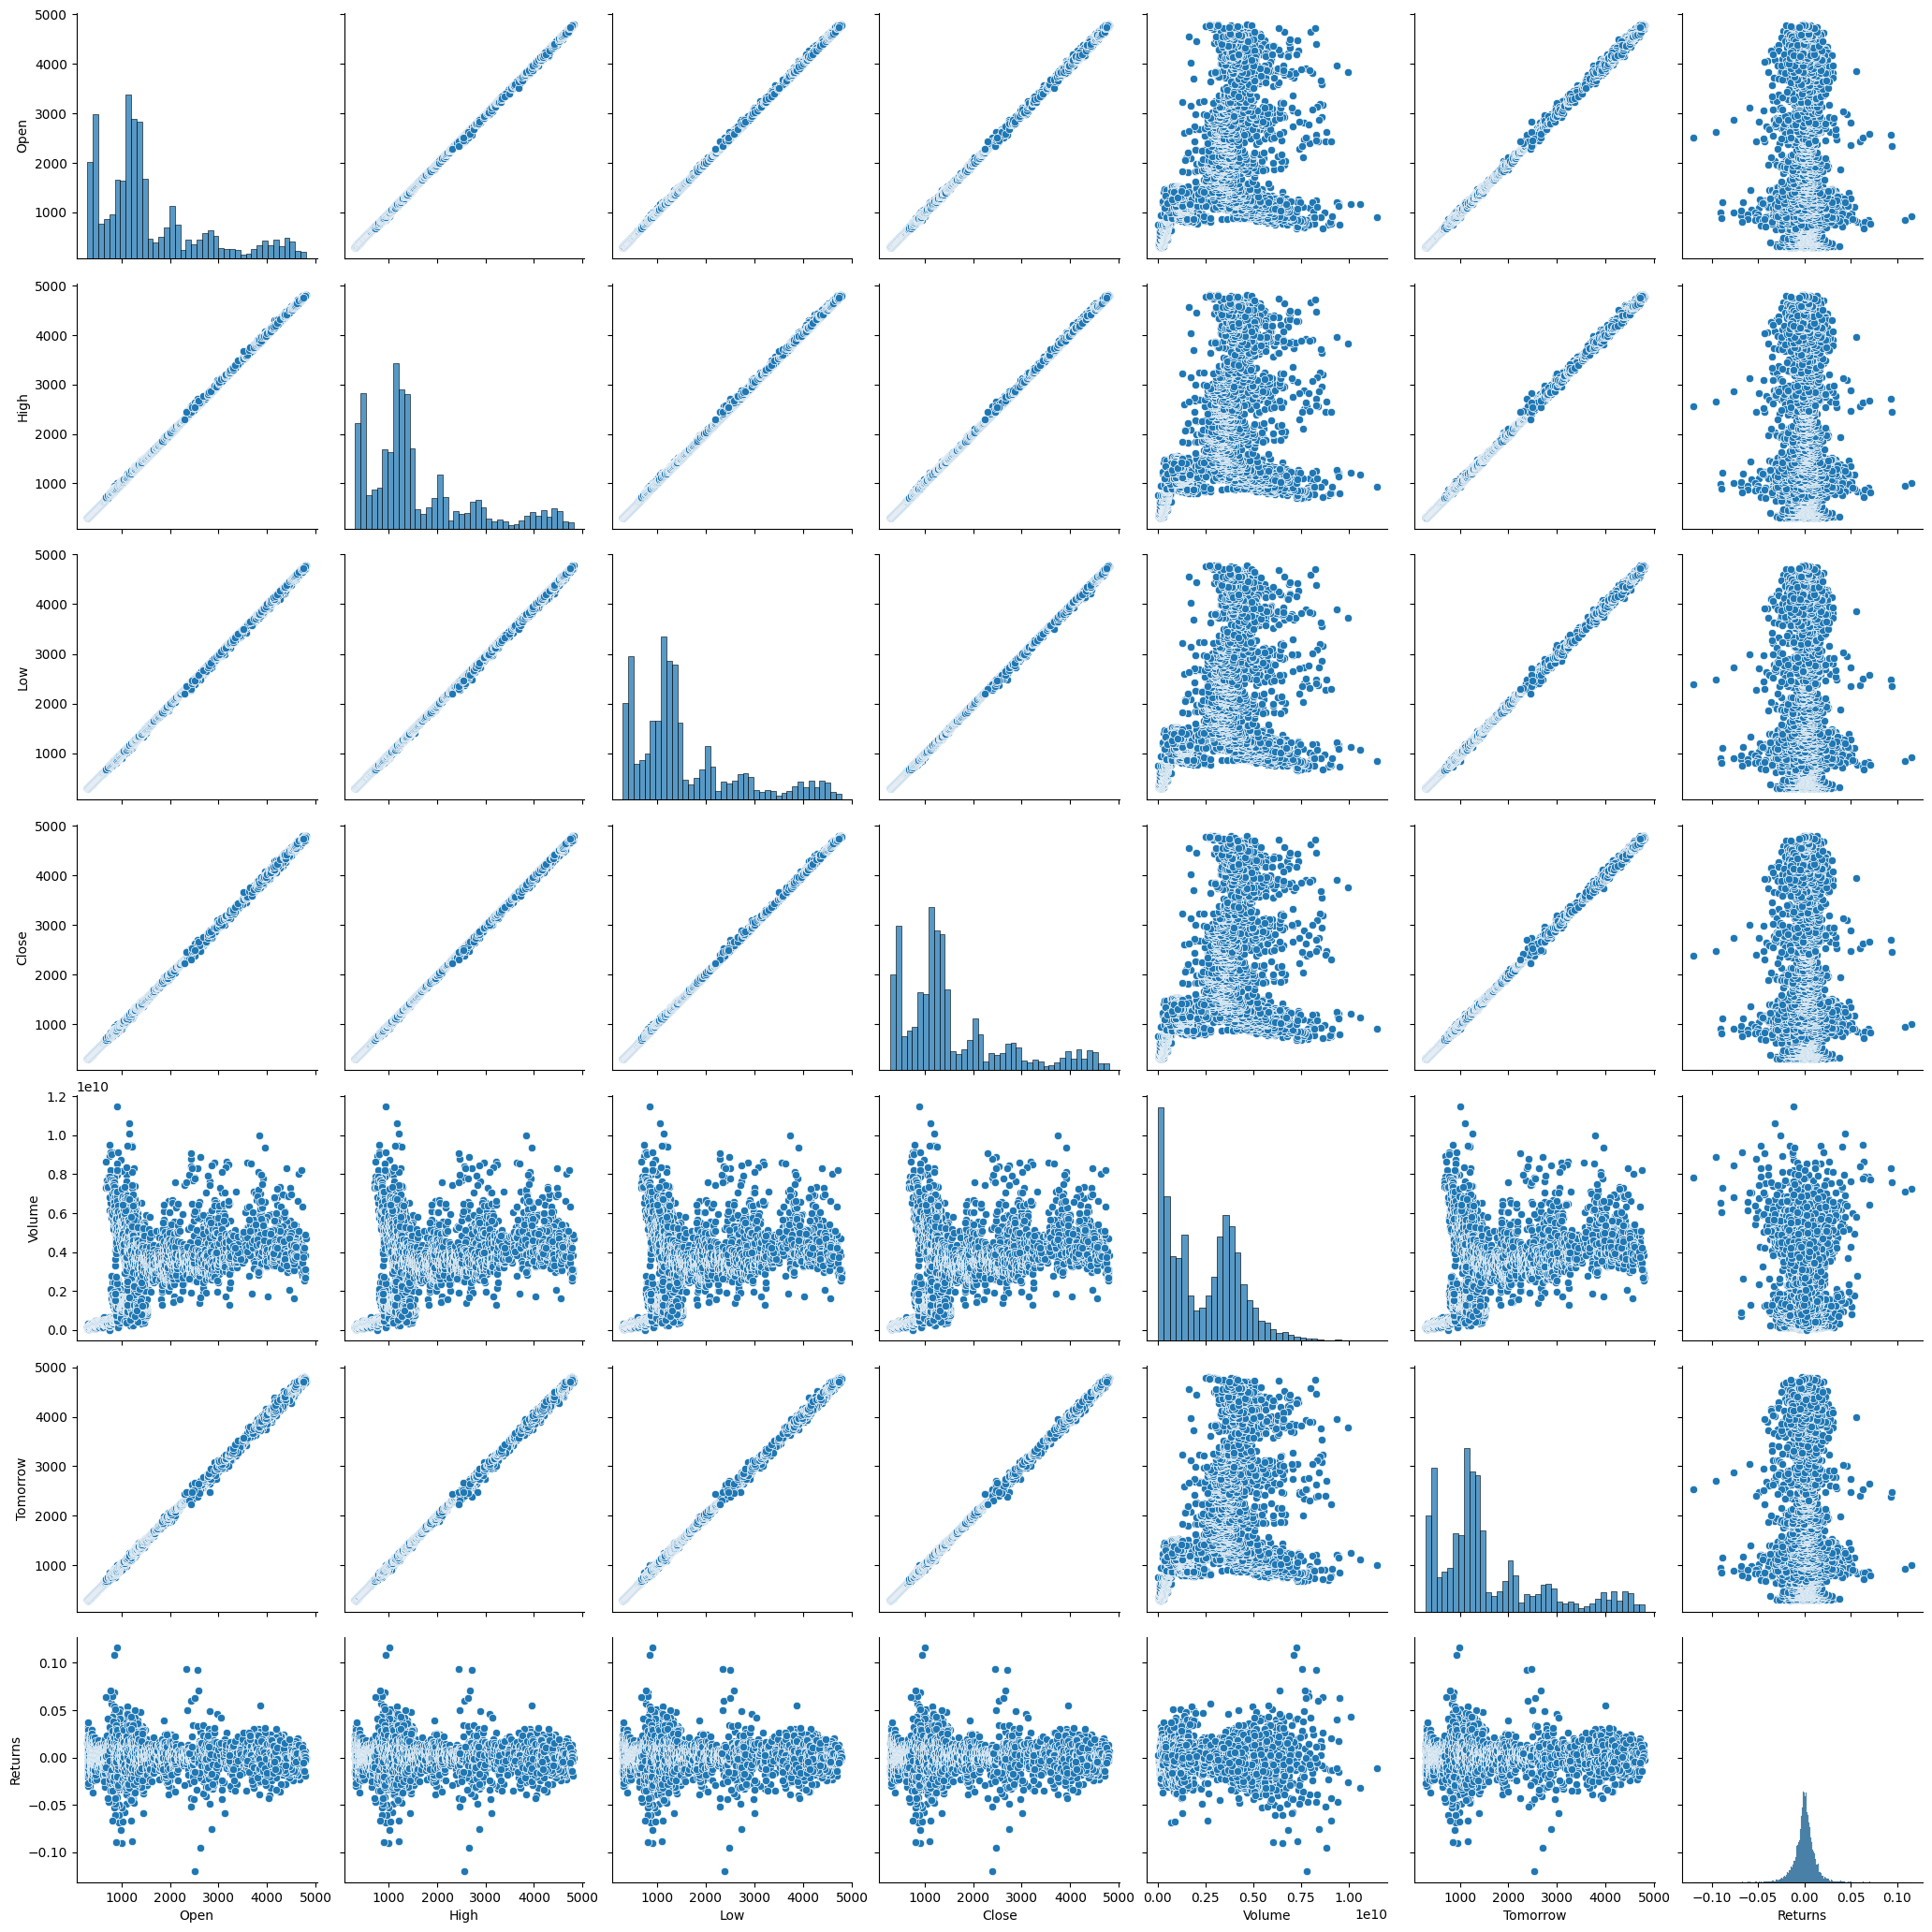

In [42]:
# Create a Seaborn pair plot to visualize pairwise relationships between numerical columns
# Excluding columns 'Increase_Decrease', 'Buy_Sell_on_Open', and 'Buy_Sell'
sns.pairplot(dataset.drop(["Increase_Decrease", "Buy_Sell_on_Open", "Buy_Sell"], axis=1), size=3)

/Users/apple/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


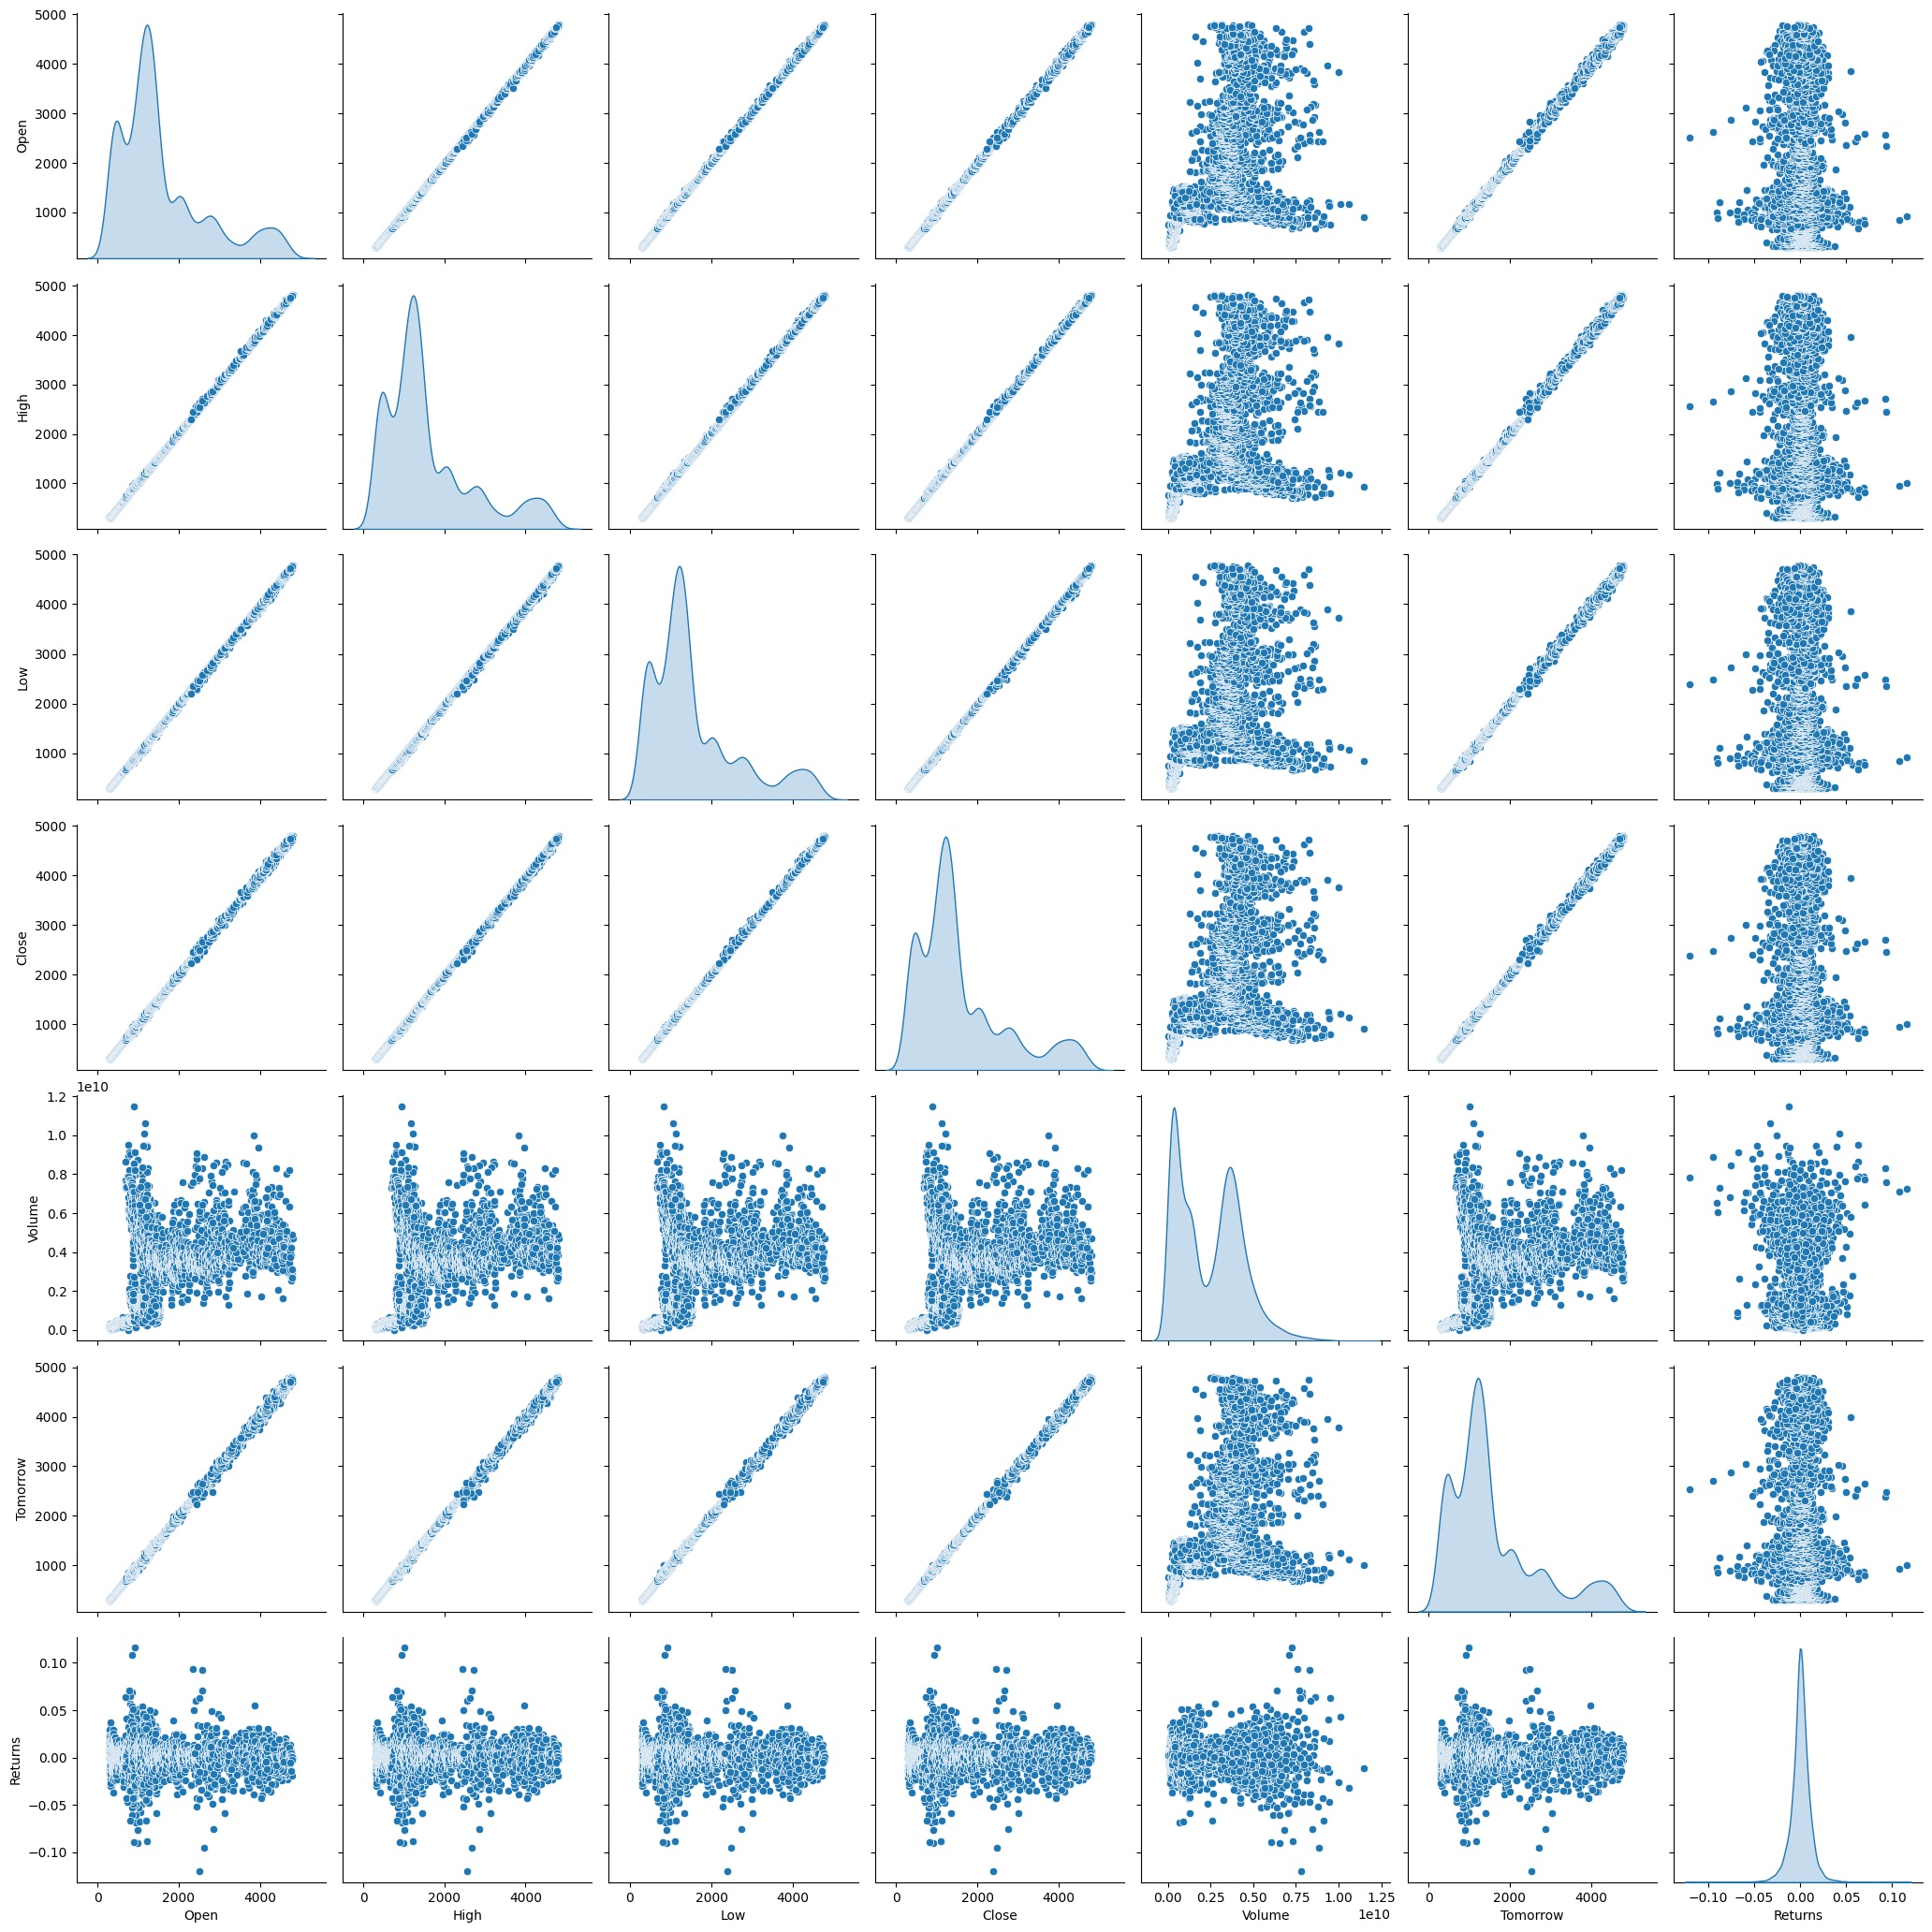

In [43]:
# Create a Seaborn pair plot with kernel density estimates on the diagonal
# Visualizing pairwise relationships between numerical columns, excluding specified columns
sns.pairplot(dataset.drop(["Increase_Decrease", "Buy_Sell_on_Open", "Buy_Sell"], axis=1), size=3, diag_kind="kde")

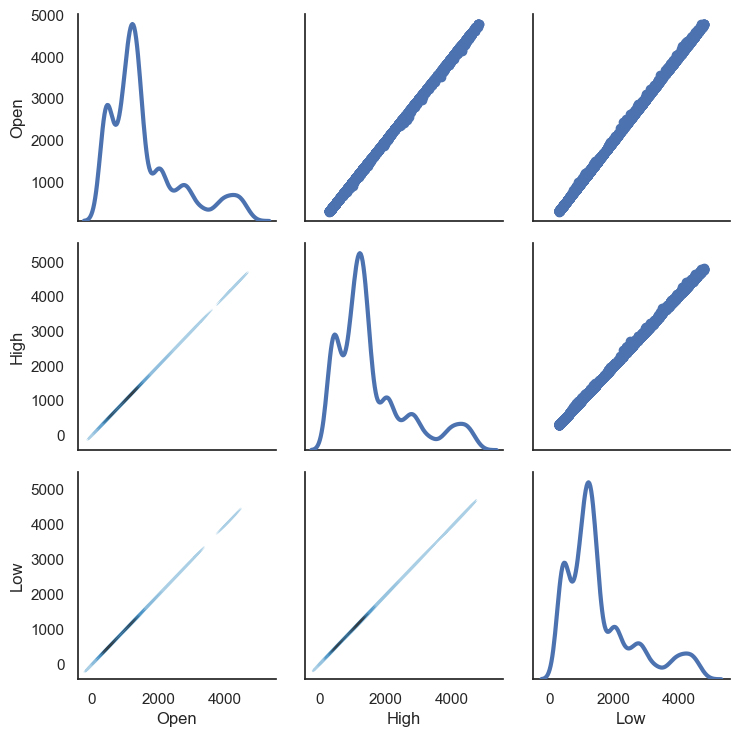

In [44]:
# Create a PairGrid for pairwise relationships with customizations. Map kernel density 
# plots to the lower triangle using a blue colormap
sns.set(style="white")
df = dataset.loc[:,['Open','High','Low']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

array([[<Axes: title={'center': 'Buy_Sell'}, xlabel='[Increase_Decrease]'>,
        <Axes: title={'center': 'Buy_Sell_on_Open'}, xlabel='[Increase_Decrease]'>,
        <Axes: title={'center': 'Close'}, xlabel='[Increase_Decrease]'>],
       [<Axes: title={'center': 'High'}, xlabel='[Increase_Decrease]'>,
        <Axes: title={'center': 'Low'}, xlabel='[Increase_Decrease]'>,
        <Axes: title={'center': 'Open'}, xlabel='[Increase_Decrease]'>],
       [<Axes: title={'center': 'Returns'}, xlabel='[Increase_Decrease]'>,
        <Axes: title={'center': 'Tomorrow'}, xlabel='[Increase_Decrease]'>,
        <Axes: title={'center': 'Volume'}, xlabel='[Increase_Decrease]'>]],
      dtype=object)

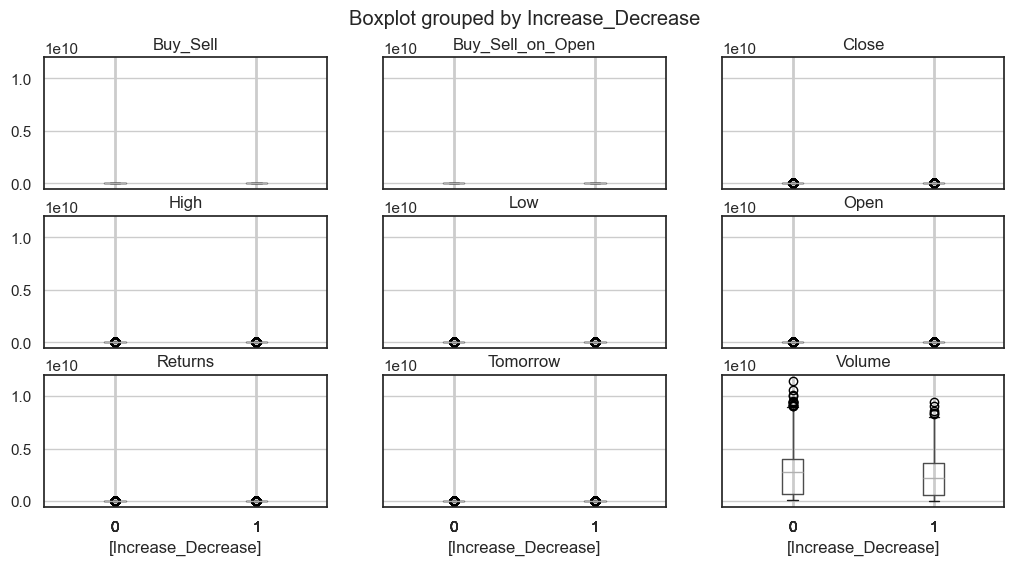

In [45]:
# Create a boxplot for the 'Close' column grouped by the 'Increase_Decrease' categories
dataset.boxplot(by="Increase_Decrease", figsize=(12, 6))

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

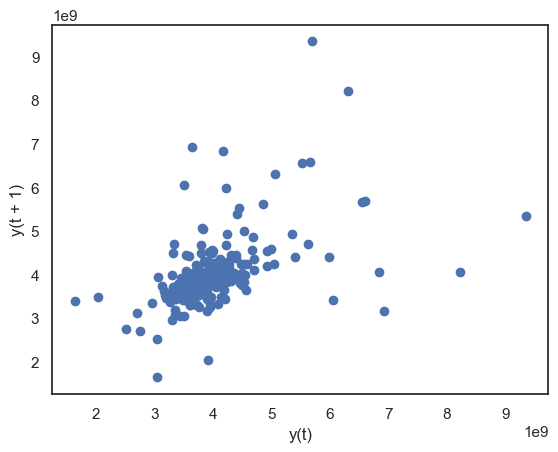

In [50]:
from pandas.plotting import lag_plot

# Create a lag plot for the 'Volume' column using the last 250 data points
lag_plot(dataset['Volume'].tail(250))

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

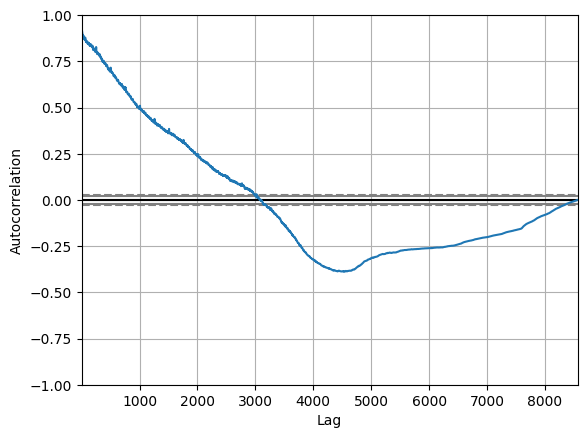

In [39]:
from pandas.plotting import autocorrelation_plot

# Create an autocorrelation plot for the 'Volume' column
autocorrelation_plot(dataset['Volume'])

<Axes: xlabel='Date'>

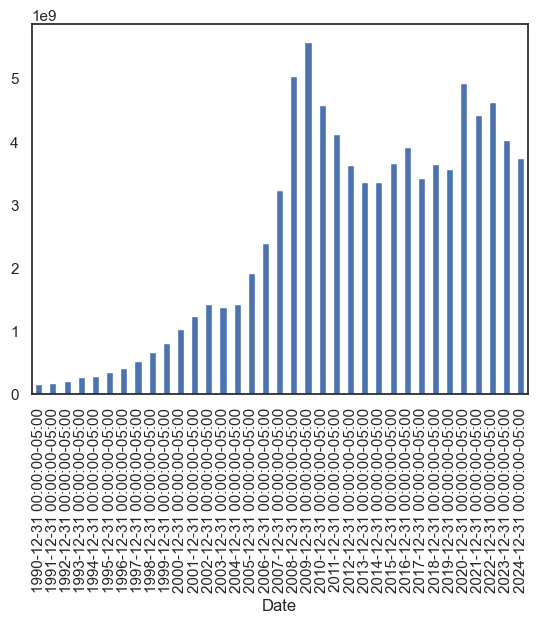

In [51]:
# Resample the 'Volume' column annually ('Y'), calculate the mean, and create a bar plot
dataset['Volume'].resample('Y').mean().plot.bar()

<Axes: >

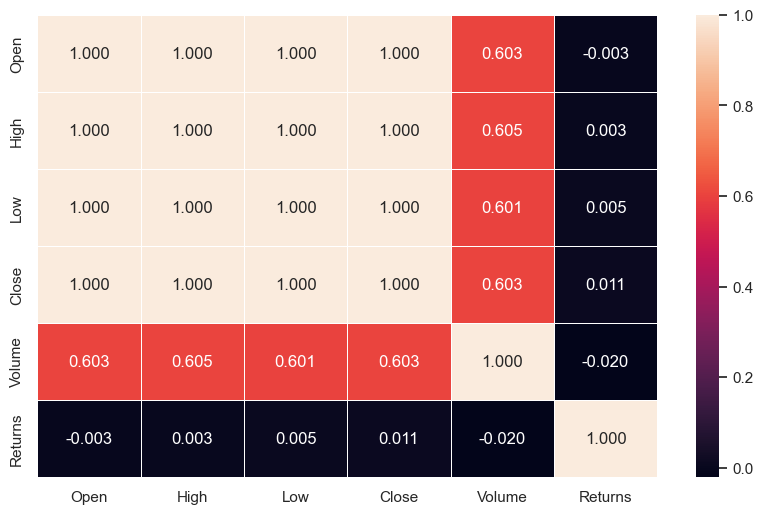

In [55]:
# Create a heatmap to visualize the correlation matrix for selected columns
# Annotate the heatmap with correlation values, set linewidth, and format values with 3 decimals
f,ax = plt.subplots(figsize=(10, 6))
sns.heatmap(dataset[['Open', 'High', 'Low', 'Close', 'Volume', 'Returns']].corr(), annot=True, linewidths=.5, fmt= '.3f',ax=ax)

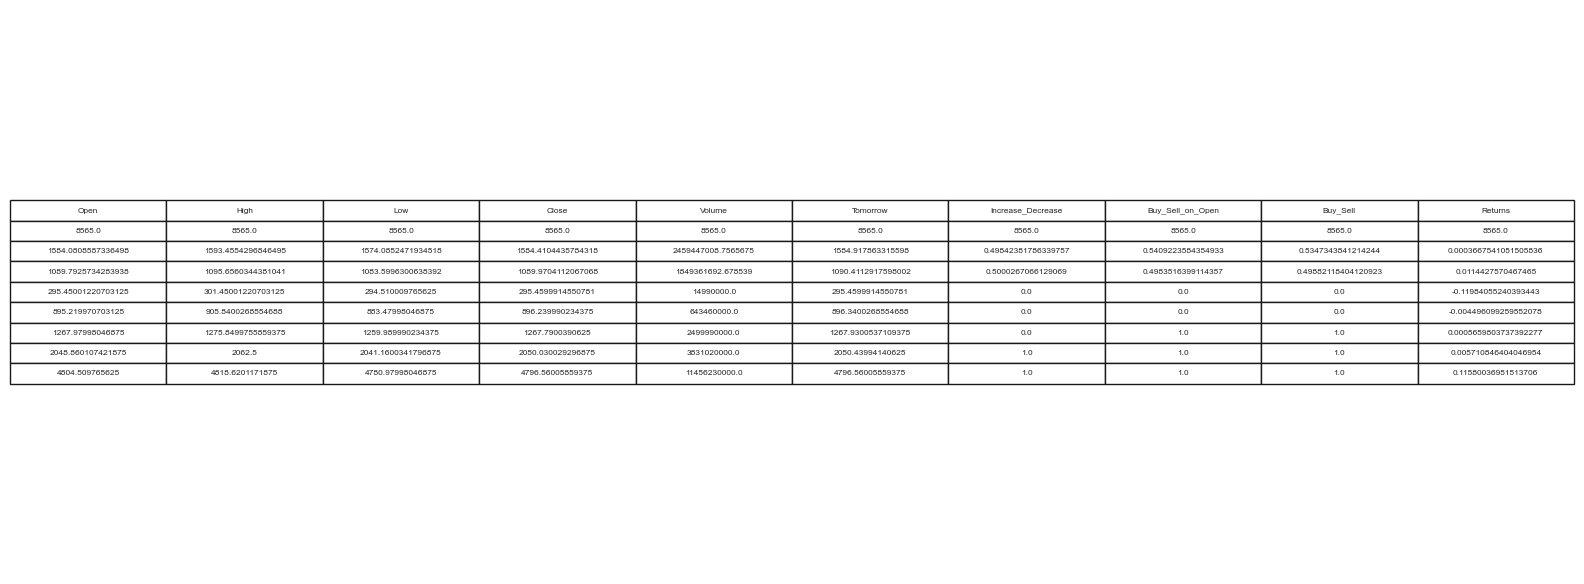

In [60]:
fig, ax = plt.subplots(figsize=(16,6))

# Create a table displaying the descriptive statistics of the dataset
# The cellText parameter contains the values, and colLabels specify column labels
# The table is centered on the plot, and tight_layout ensures proper spacing
ax.axis('off')
ax.table(cellText=dataset.describe().values, colLabels=dataset.describe().columns, loc='center', cellLoc='center')

# Adjust the layout for a cleaner display
fig.tight_layout()
plt.show()